In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# to get reproducible results:
np.random.seed(1234)
tf.random.set_seed(1234)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving The-Office-Lines-V4.csv to The-Office-Lines-V4.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['The-Office-Lines-V4.csv'])) 

In [ ]:
df = pd.read_csv('The-Office-Lines-V4.csv')

In [ ]:
df= df.drop('Unnamed: 6', 1)

def gender(name):
    if name == 'Michael' or name == 'Jim' or name == 'Dwight' or name == 'Ryan' or name == 'Stanley' or name == 'Kevin' or name == 'Oscar' or name == 'Toby' or name == 'Creed' or name == 'Andy' or name == 'Roy' or name == 'Darryl' or name == 'Gabe' or name == 'Robert California' or name == 'Robert' or name == 'Clark' or name == 'Pete':
        return 0
    elif name == 'Pam' or name == 'Phyllis' or name == 'Angela' or name == 'Kelly' or name == 'Meredith' or name == 'Jan' or name == 'Erin' or name == 'Nellie':
        return 1
    
df["gender"] = df["speaker"].map(gender)

df = df.dropna()

df['gender'] = df['gender'].astype(int)

df['number_of_words'] = df['line'].str.split().str.len()

df['speaker_id'] = pd.factorize(df.speaker)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [ ]:
df

,season,episode,title,scene,speaker,line,gender,number_of_words,speaker_id
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,0,14,0
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",0,9,1
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,0,14,0
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",0,8,1
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",0,10,0
...,...,...,...,...,...,...,...,...,...
54621,9,24,Finale,8153,Creed,It all seems so very arbitrary. I applied for ...,0,55,16
54622,9,24,Finale,8154,Meredith,I just feel lucky that I got a chance to share...,1,41,14
54623,9,24,Finale,8155,Phyllis,I'm happy that this was all filmed so I can re...,1,31,5
54624,9,24,Finale,8156,Jim,I sold paper at this company for 12 years. My ...,0,46,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['line']
y = df['speaker_id']
num_classes = len(pd.unique(df['speaker_id']))

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42, test_size=.33)

In [ ]:
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

print(len(X_val))
print(len(y_val))

print(len(y_train))
print(len(y_test))



31934
15967
15967
15967
31934
15967


In [ ]:
# padding: not all lines are the same length, but they have to be the same length for NN; padding will fix this
# do this for train, test and val sets
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

lines_Xtrain = list(X_train)
lines_Xval = list(X_val)
lines_Xtest = list(X_test)

# there will be a max length of line (maxlen), which should be the length of the longest sentence. this number should be the same in all sets
longest_line_Xtrain = (max(lines_Xtrain, key=len))
maxlen_Xtrain = len(longest_line_Xtrain.split())

# longest_line_Xval = (max(lines_Xval, key=len))
maxlen_Xval = maxlen_Xtrain
# len(longest_line_Xval.split())

# longest_line_Xtest = (max(lines_Xtest, key=len))
maxlen_Xtest = maxlen_Xtrain
# len(longest_line_Xtest.split())

# only 1000 most frequent words & oov_token so any unknown word in test set wont just be thrown away, but will be replaced by token we choose
tokenizer = Tokenizer(num_words = 10000, oov_token="<OOV>")
tokenizer.fit_on_texts(lines_Xtrain)
word_index = tokenizer.word_index

sequences_Xtrain = tokenizer.texts_to_sequences(lines_Xtrain)
sequences_Xval = tokenizer.texts_to_sequences(lines_Xval)
sequences_Xtest = tokenizer.texts_to_sequences(lines_Xtest)


# default padding is pre, so zeros will occur before ints
padded_Xtrain = pad_sequences(sequences_Xtrain, maxlen = maxlen_Xtrain)
padded_Xval = pad_sequences(sequences_Xval, maxlen = maxlen_Xval)
padded_Xtest = pad_sequences(sequences_Xtest, maxlen = maxlen_Xtest)

print("\n Padded sequences train: \n", padded_Xtrain)
print("\n Padded sequences val: \n", padded_Xval)
print("\n Padded sequences test: \n", padded_Xtest)

# now each row in the matrix is a line with the same length, and oov_token specifiec out-of-vocabulary tokens that arent recognized
# also, only 10 000 most frequent words are included



 Padded sequences train: 
 [[   0    0    0 ...    3  986   17]
 [   0    0    0 ...    0    0 8198]
 [   0    0    0 ...   78  668  213]
 ...
 [   0    0    0 ...   38   12  594]
 [   0    0    0 ...   19  145 4544]
 [   0    0    0 ...   35   34 1509]]

 Padded sequences val: 
 [[   0    0    0 ...   25   14   68]
 [   0    0    0 ...   27   23  591]
 [   0    0    0 ...   46    7 1343]
 ...
 [   0    0    0 ...  651  704  690]
 [   0    0    0 ...    2   76  232]
 [   0    0    0 ...    9   56   15]]

 Padded sequences test: 
 [[   0    0    0 ...  584    3   68]
 [   0    0    0 ...    0    0 3819]
 [   0    0    0 ...  289  180  455]
 ...
 [   0    0    0 ...    0    0 4679]
 [   0    0    0 ...    0    0   45]
 [   0    0    0 ...    0  391 5887]]


In [ ]:
# data should be float32, not int. goes for output too
# also everything should be a numpy array
y_train = np.asarray(y_train).astype('float32')
y_val = np.asarray(y_val).astype('float32')
y_test = np.asarray(y_test).astype('float32') 
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(31934,)
(15967,)
(15967,)


In [ ]:
print(y_train[:])
# no longer zeroes and ones, but multiclass labels; each number refers to a speaker

[ 3.  1.  3. ... 17.  2.  9.]


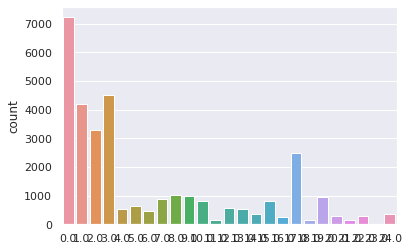

In [ ]:
# lets look at their distribution
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=y_train)
# a lot of difference here!

# y-axis refers to the number of times each speaker has a line, so 0=michael, he has lines in the 5000s

In [ ]:
# now we create the model
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(232,))) # putting the maxlen here, we know from binary NN
model.add(keras.layers.Dense(num_classes, activation='softmax', name='banana'))
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 banana (Dense)              (None, 25)                5825      
                                                                 
Total params: 5,825
Trainable params: 5,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# now the optimizer. using categorical crossentropy bc we're doing multiclass prediction
sgd = keras.optimizers.SGD(learning_rate=0.001) 
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
print(X_train.shape)

(31934,)


In [ ]:
# now predict
pred = model.predict(padded_Xtrain)
print(pred.shape) 
print(pred[:])

(31934, 25)
[[0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 ...
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 6.839222e-34
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]]


In [ ]:
# we got a matrix with 25 columns for all instances in the training set. good i guess!!
# however, we should convert the class labels to one-hot encoded class vectors. very important!
from tensorflow.keras.utils import to_categorical 
Y_train = to_categorical(y_train, num_classes=num_classes)
Y_val = to_categorical(y_val, num_classes=num_classes)
Y_test = to_categorical(y_test, num_classes=num_classes)

print(y_train.shape)
print(Y_train.shape)

print(y_train[:10])
print(Y_train[:10, :])
# thats better! as we see, a lot of zeroes. this is a one-hot representation. what does that mean?
# it means that every number in a sequence is a class; if it is 0, the instance doesnt belong to the class. if it is 1, it does
# so if the second number in the sequence is 1, then the instance belongs to class 2, speaker_id 2. 
# this is better because then you maximize the score for the class that does apply and completely minimize it for those that dont apply


(31934,)
(31934, 25)
[ 3.  1.  3.  3.  0.  9.  0. 17.  0.  1.]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


In [ ]:
# now we can fit the classifier with this matrix
num_epochs = 20
history = model.fit(padded_Xtrain, Y_train, epochs=num_epochs, validation_data=(padded_Xval, Y_val), batch_size=100)

Epoch 1/20
320/320 [==============================] - 2s 6ms/step - loss: 492.0510 - accuracy: 0.1110 - val_loss: 421.4939 - val_accuracy: 0.1191
Epoch 2/20
320/320 [==============================] - 2s 6ms/step - loss: 496.2358 - accuracy: 0.1154 - val_loss: 472.9690 - val_accuracy: 0.1184
Epoch 3/20
320/320 [==============================] - 2s 5ms/step - loss: 482.3710 - accuracy: 0.1162 - val_loss: 623.8245 - val_accuracy: 0.0670
Epoch 4/20
320/320 [==============================] - 2s 5ms/step - loss: 489.5954 - accuracy: 0.1121 - val_loss: 663.9097 - val_accuracy: 0.0869
Epoch 5/20
320/320 [==============================] - 2s 5ms/step - loss: 499.7448 - accuracy: 0.1158 - val_loss: 769.2317 - val_accuracy: 0.1099
Epoch 6/20
320/320 [==============================] - 2s 6ms/step - loss: 489.3825 - accuracy: 0.1168 - val_loss: 635.1788 - val_accuracy: 0.1380
Epoch 7/20
320/320 [==============================] - 2s 5ms/step - loss: 493.5482 - accuracy: 0.1127 - val_loss: 708.8549 -

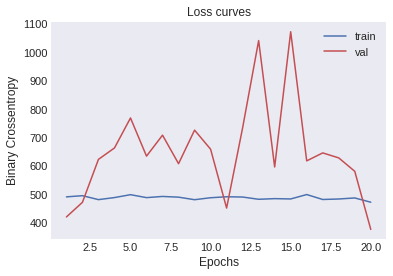

In [ ]:
# well that is very, very bad. why? i think its just the problem itself, not the model. might just be too difficult to predict who said something
# from just the words that were said. 
# lets plot learning curves and see whats going on

plt.style.use('seaborn-dark')

epochs = range(1, num_epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'b', label='train')
plt.plot(epochs, val_loss, 'r', label='val')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Binary Crossentropy');

# the patters are very different, which indicates overfitting



In [ ]:
history_dict = history.history
loss_values = history.history['loss']
acc_values = history.history['accuracy']

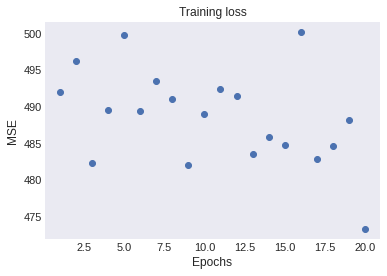

In [ ]:
epochs = range(1, num_epochs + 1)
plt.plot(epochs, loss_values, 'bo')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('MSE');

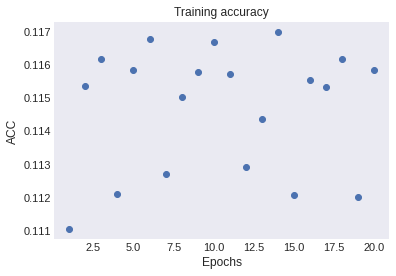

In [ ]:
# seems that model just cant figure anything out?
plt.plot(epochs, acc_values, 'bo')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC');

In [ ]:
# model appears to be steadily increasing the last few epochs. maybe more epochs will help? 

In [ ]:
num_epochs = 50
history = model.fit(padded_Xtrain, Y_train, epochs=num_epochs, validation_data=(padded_Xval, Y_val), batch_size=100 )

Epoch 1/50
320/320 [==============================] - 2s 6ms/step - loss: 488.1308 - accuracy: 0.1155 - val_loss: 451.7885 - val_accuracy: 0.0898
Epoch 2/50
320/320 [==============================] - 2s 6ms/step - loss: 489.7665 - accuracy: 0.1149 - val_loss: 701.0061 - val_accuracy: 0.1971
Epoch 3/50
320/320 [==============================] - 2s 6ms/step - loss: 479.9704 - accuracy: 0.1185 - val_loss: 434.4131 - val_accuracy: 0.1571
Epoch 4/50
320/320 [==============================] - 3s 8ms/step - loss: 495.4358 - accuracy: 0.1139 - val_loss: 675.1232 - val_accuracy: 0.0372
Epoch 5/50
320/320 [==============================] - 2s 5ms/step - loss: 490.0024 - accuracy: 0.1161 - val_loss: 611.2462 - val_accuracy: 0.1321
Epoch 6/50
320/320 [==============================] - 2s 5ms/step - loss: 487.9464 - accuracy: 0.1129 - val_loss: 437.9625 - val_accuracy: 0.0638
Epoch 7/50
320/320 [==============================] - 2s 5ms/step - loss: 495.8213 - accuracy: 0.1162 - val_loss: 582.8511 -

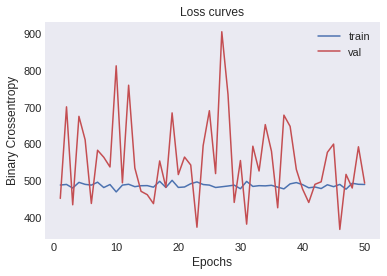

In [ ]:
plt.style.use('seaborn-dark')

epochs = range(1, num_epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'b', label='train')
plt.plot(epochs, val_loss, 'r', label='val')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Binary Crossentropy');

# no difference; model just isnt good for this problem. maybe adam is a little better? 

In [ ]:
# lets try Adam optimizer

adammodel = keras.models.Sequential()
adammodel.add(keras.layers.Input(shape=(232,))) 
adammodel.add(keras.layers.Dense(num_classes, activation='softmax', name='banana'))
adammodel.summary() 


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 banana (Dense)              (None, 25)                5825      
                                                                 
Total params: 5,825
Trainable params: 5,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = keras.optimizers.Adam(learning_rate=0.001) 
adammodel.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
pred = adammodel.predict(padded_Xtrain)
print(pred.shape)
print(pred[:])

(31934, 25)
[[0.0000000e+00 0.0000000e+00 1.1271412e-25 ... 2.4582242e-10
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.7431125e-32 0.0000000e+00 1.0698649e-36 ... 1.0001048e-19
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [ ]:
num_epochs = 20
history = adammodel.fit(padded_Xtrain, Y_train, epochs=num_epochs, validation_data=(padded_Xval, Y_val), batch_size=100 )

Epoch 1/20
320/320 [==============================] - 2s 5ms/step - loss: 184.9119 - accuracy: 0.0975 - val_loss: 60.0547 - val_accuracy: 0.1382
Epoch 2/20
320/320 [==============================] - 2s 7ms/step - loss: 40.1561 - accuracy: 0.1405 - val_loss: 25.5094 - val_accuracy: 0.1272
Epoch 3/20
320/320 [==============================] - 2s 6ms/step - loss: 20.8529 - accuracy: 0.1456 - val_loss: 16.1287 - val_accuracy: 0.1687
Epoch 4/20
320/320 [==============================] - 2s 5ms/step - loss: 14.3152 - accuracy: 0.1561 - val_loss: 12.0961 - val_accuracy: 0.1563
Epoch 5/20
320/320 [==============================] - 2s 6ms/step - loss: 11.6403 - accuracy: 0.1571 - val_loss: 9.6393 - val_accuracy: 0.1674
Epoch 6/20
320/320 [==============================] - 2s 6ms/step - loss: 10.1491 - accuracy: 0.1620 - val_loss: 9.1450 - val_accuracy: 0.1696
Epoch 7/20
320/320 [==============================] - 2s 5ms/step - loss: 9.4610 - accuracy: 0.1624 - val_loss: 8.7392 - val_accuracy: 0.

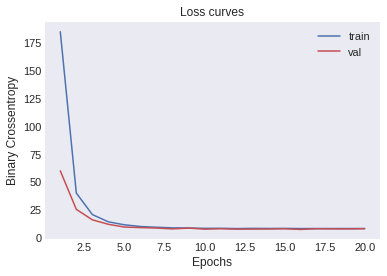

In [ ]:
plt.style.use('seaborn-dark')

epochs = range(1, num_epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'b', label='train')
plt.plot(epochs, val_loss, 'r', label='val')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Binary Crossentropy');

# thats better! train and val set loss both go down :) 

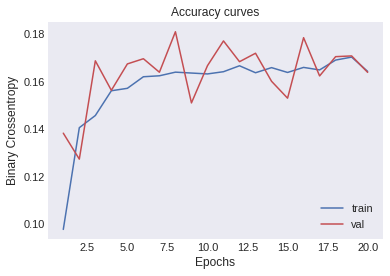

In [ ]:
plt.style.use('seaborn-dark')

epochs = range(1, num_epochs + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, train_acc, 'b', label='train')
plt.plot(epochs, val_acc, 'r', label='val')
plt.title('Accuracy curves')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Binary Crossentropy');

# accuracy does go up, especially in the val set, but it remains very low
# lets see what an additional layer does

In [ ]:
adammodel = keras.models.Sequential()
adammodel.add(keras.layers.Input(shape=(232,))) 
adammodel.add(keras.layers.Dense(500, activation='relu', name='hidden'))
adammodel.add(keras.layers.Dense(num_classes, activation='softmax', name='banana'))
adammodel.summary() 
# this makes the model a lot bigger, as we can see from the parameters

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 500)               116500    
                                                                 
 banana (Dense)              (None, 25)                12525     
                                                                 
Total params: 129,025
Trainable params: 129,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = keras.optimizers.Adam(learning_rate=0.001) 
adammodel.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
num_epochs = 20
history = adammodel.fit(padded_Xtrain, Y_train, epochs=num_epochs, validation_data=(padded_Xval, Y_val), batch_size=100 )

Epoch 1/20
320/320 [==============================] - 4s 9ms/step - loss: 69.4409 - accuracy: 0.1225 - val_loss: 40.3968 - val_accuracy: 0.1586
Epoch 2/20
320/320 [==============================] - 2s 7ms/step - loss: 37.0163 - accuracy: 0.1436 - val_loss: 28.2285 - val_accuracy: 0.1585
Epoch 3/20
320/320 [==============================] - 2s 5ms/step - loss: 27.5666 - accuracy: 0.1540 - val_loss: 25.1101 - val_accuracy: 0.2027
Epoch 4/20
320/320 [==============================] - 2s 5ms/step - loss: 21.8308 - accuracy: 0.1618 - val_loss: 18.3942 - val_accuracy: 0.1901
Epoch 5/20
320/320 [==============================] - 2s 5ms/step - loss: 18.0616 - accuracy: 0.1681 - val_loss: 14.5063 - val_accuracy: 0.2016
Epoch 6/20
320/320 [==============================] - 2s 6ms/step - loss: 15.3952 - accuracy: 0.1743 - val_loss: 12.1741 - val_accuracy: 0.2044
Epoch 7/20
320/320 [==============================] - 2s 5ms/step - loss: 13.0604 - accuracy: 0.1797 - val_loss: 10.9865 - val_accuracy:

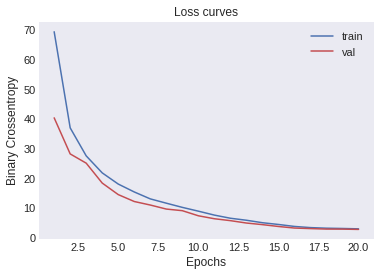

In [ ]:
plt.style.use('seaborn-dark')

epochs = range(1, num_epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'b', label='train')
plt.plot(epochs, val_loss, 'r', label='val')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Binary Crossentropy');
#loss stays in that steady decrease, so extra layer doesnt change the loss

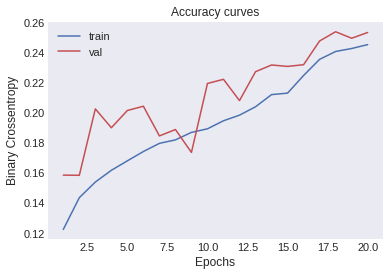

In [ ]:
plt.style.use('seaborn-dark')

epochs = range(1, num_epochs + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, train_acc, 'b', label='train')
plt.plot(epochs, val_acc, 'r', label='val')
plt.title('Accuracy curves')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Binary Crossentropy');
# the accuracy does go up! so maybe a more complex model is needed here. 

In [ ]:
adammodel = keras.models.Sequential()
adammodel.add(keras.layers.Input(shape=(232,))) 
adammodel.add(keras.layers.Dense(500, activation='relu', name='hidden'))
adammodel.add(keras.layers.Dense(500, activation='relu', name='hidden2'))
adammodel.add(keras.layers.Dense(num_classes, activation='softmax', name='banana'))
adammodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 500)               116500    
                                                                 
 hidden2 (Dense)             (None, 500)               250500    
                                                                 
 banana (Dense)              (None, 25)                12525     
                                                                 
Total params: 379,525
Trainable params: 379,525
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = keras.optimizers.Adam(learning_rate=0.001) 
adammodel.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
num_epochs = 20
history = adammodel.fit(padded_Xtrain, Y_train, epochs=num_epochs, validation_data=(padded_Xval, Y_val), batch_size=100 )

Epoch 1/20
320/320 [==============================] - 5s 12ms/step - loss: 24.3540 - accuracy: 0.1385 - val_loss: 3.1747 - val_accuracy: 0.2193
Epoch 2/20
320/320 [==============================] - 3s 10ms/step - loss: 2.9823 - accuracy: 0.2219 - val_loss: 2.8439 - val_accuracy: 0.2267
Epoch 3/20
320/320 [==============================] - 3s 8ms/step - loss: 2.7777 - accuracy: 0.2259 - val_loss: 2.7331 - val_accuracy: 0.2286
Epoch 4/20
320/320 [==============================] - 3s 9ms/step - loss: 2.6830 - accuracy: 0.2273 - val_loss: 2.6444 - val_accuracy: 0.2288
Epoch 5/20
320/320 [==============================] - 4s 13ms/step - loss: 2.6281 - accuracy: 0.2272 - val_loss: 2.6070 - val_accuracy: 0.2287
Epoch 6/20
320/320 [==============================] - 3s 11ms/step - loss: 2.6086 - accuracy: 0.2274 - val_loss: 2.5885 - val_accuracy: 0.2284
Epoch 7/20
320/320 [==============================] - 3s 9ms/step - loss: 2.5866 - accuracy: 0.2277 - val_loss: 2.5767 - val_accuracy: 0.2290
E

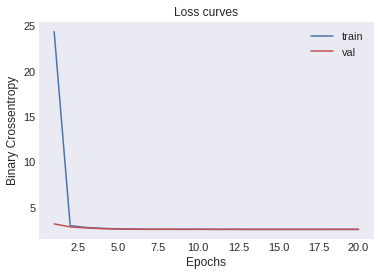

In [ ]:
# loss
plt.style.use('seaborn-dark')

epochs = range(1, num_epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'b', label='train')
plt.plot(epochs, val_loss, 'r', label='val')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Binary Crossentropy');

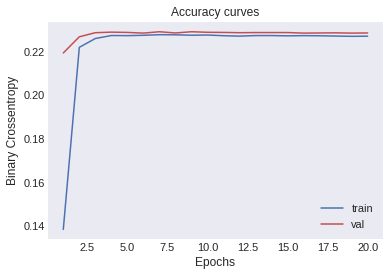

In [ ]:
# accuracy
plt.style.use('seaborn-dark')

epochs = range(1, num_epochs + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, train_acc, 'b', label='train')
plt.plot(epochs, val_acc, 'r', label='val')
plt.title('Accuracy curves')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Binary Crossentropy');
# accuracy doesnt increase after a certain point, and that point is lower than the max accuracy with the last model. so maybe more complexity doesnt do it. 
# lets try the last model, but with more epochs

In [ ]:
adammodel = keras.models.Sequential()
adammodel.add(keras.layers.Input(shape=(232,))) 
adammodel.add(keras.layers.Dense(500, activation='relu', name='hidden'))
adammodel.add(keras.layers.Dense(num_classes, activation='softmax', name='banana'))
adammodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 500)               116500    
                                                                 
 banana (Dense)              (None, 25)                12525     
                                                                 
Total params: 129,025
Trainable params: 129,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = keras.optimizers.Adam(learning_rate=0.001) 
adammodel.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
num_epochs = 50
history = adammodel.fit(padded_Xtrain, Y_train, epochs=num_epochs, validation_data=(padded_Xval, Y_val), batch_size=100 )

Epoch 1/50
320/320 [==============================] - 5s 11ms/step - loss: 69.1075 - accuracy: 0.1238 - val_loss: 41.6591 - val_accuracy: 0.1546
Epoch 2/50
320/320 [==============================] - 3s 8ms/step - loss: 37.1688 - accuracy: 0.1437 - val_loss: 28.3331 - val_accuracy: 0.1412
Epoch 3/50
320/320 [==============================] - 3s 8ms/step - loss: 27.0577 - accuracy: 0.1545 - val_loss: 20.9333 - val_accuracy: 0.1811
Epoch 4/50
320/320 [==============================] - 3s 9ms/step - loss: 20.8760 - accuracy: 0.1637 - val_loss: 18.0870 - val_accuracy: 0.1768
Epoch 5/50
320/320 [==============================] - 2s 6ms/step - loss: 17.8799 - accuracy: 0.1683 - val_loss: 14.5881 - val_accuracy: 0.1824
Epoch 6/50
320/320 [==============================] - 2s 6ms/step - loss: 15.0724 - accuracy: 0.1777 - val_loss: 11.5262 - val_accuracy: 0.1806
Epoch 7/50
320/320 [==============================] - 3s 8ms/step - loss: 12.7403 - accuracy: 0.1826 - val_loss: 11.5618 - val_accuracy

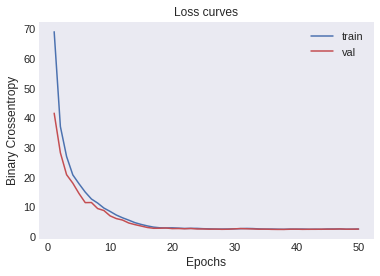

In [ ]:
plt.style.use('seaborn-dark')

epochs = range(1, num_epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'b', label='train')
plt.plot(epochs, val_loss, 'r', label='val')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Binary Crossentropy');
# loss isnt getting any lower either, so model isnt learning anything anymore

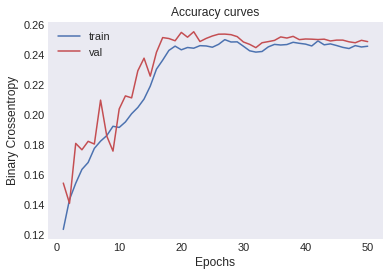

In [ ]:
plt.style.use('seaborn-dark')

epochs = range(1, num_epochs + 1)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, train_acc, 'b', label='train')
plt.plot(epochs, val_acc, 'r', label='val')
plt.title('Accuracy curves')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Binary Crossentropy');
# accuracy appears to be reaching a plateau

In [ ]:
# i think this is the best we will get from this model. which is quite bad. now lets make a prediction variable
Y_pred = adammodel.predict(padded_Xtest, batch_size=100)
print(Y_pred.shape)


(15967, 25)


In [ ]:
# now we need to convert those binary class sequences back to the actual classes, to eventually print the report
# to do this we use np.argmax() which will return the index of the column which has the highest score
y_pred = np.argmax(Y_pred, axis=1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# now we can do the classification report
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
print(accuracy_score(y_true=y_test, y_pred=y_pred))
print(f1_score(y_true=y_test, y_pred=y_pred, average='macro'))
print(classification_report(y_true=y_test, y_pred=y_pred))

# precision = portion of positive identifications that were actually correct
# recall = portion of actual positives that were identified correctly
# f1-score = balance between p & r, perfect p & r means f1=1

0.2455689860336945
0.06823296617237902
              precision    recall  f1-score   support

         0.0       0.23      0.98      0.37      3597
         1.0       0.72      0.03      0.05      2131
         2.0       0.70      0.02      0.04      1619
         3.0       0.55      0.05      0.08      2241
         4.0       0.70      0.03      0.05       251
         5.0       1.00      0.01      0.02       341
         6.0       0.86      0.03      0.05       232
         7.0       0.92      0.02      0.05       449
         8.0       0.82      0.02      0.03       527
         9.0       0.77      0.02      0.04       489
        10.0       0.65      0.03      0.05       397
        11.0       0.50      0.01      0.03        71
        12.0       0.85      0.04      0.07       282
        13.0       0.80      0.05      0.09       257
        14.0       0.75      0.02      0.03       184
        15.0       1.00      0.02      0.03       403
        16.0       1.00      0.02      0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# precision seems to be either quite high or quite low; very little middle ground. even perfect precision for ID21, 15 and 16! however,
# recall for those is pretty low. so these numbers seem to be pretty unbalanced. all recall numbers are <= 0.10, but ID0 is 0.98... 
# all in all, not that good. f1 score of 0.068 is quite close to 0 too. and accuracy, even though we managed to increase it by about 0.15, is still quite low: 0.25
# there is quite an imbalance in our data, so weighted average might be more interesting to look at
# it gives a recall average of .25 but we know that most of the numbers are under .10
# weighted precision average of .61, which is pretty bad
# not the best model!
